### Training a Multilayer network of sigmoid neron by OPTIMIZATION(Without supplying gradient)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from mpl_toolkits import mplot3d
import time
import sklearn.datasets as ds

%run my_lib.ipynb
%run binary_dataset_gallery.ipynb
from sklearn.neural_network import MLPClassifier


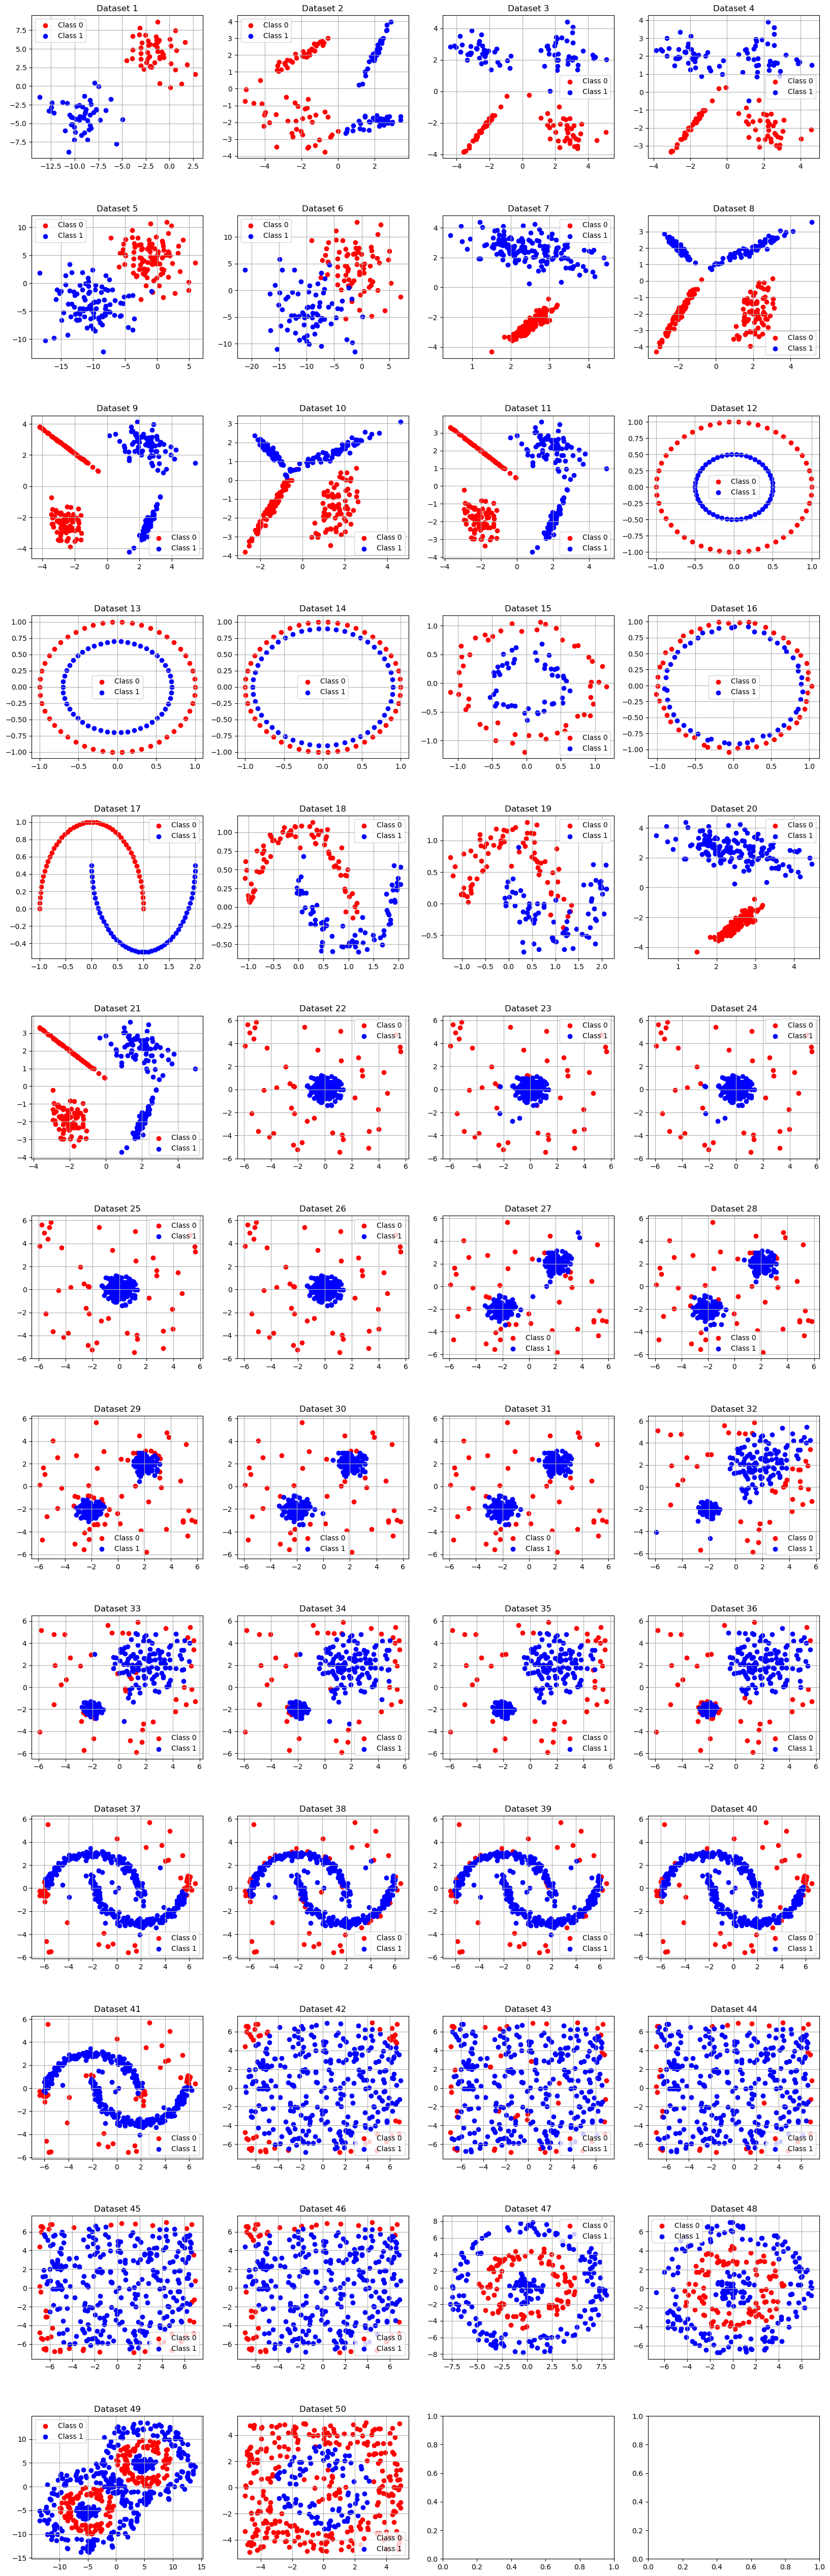

In [2]:
XD,yD=binary_dataset_galery()
plot_gallery(XD,yD,n_cols=4,fsize=20)

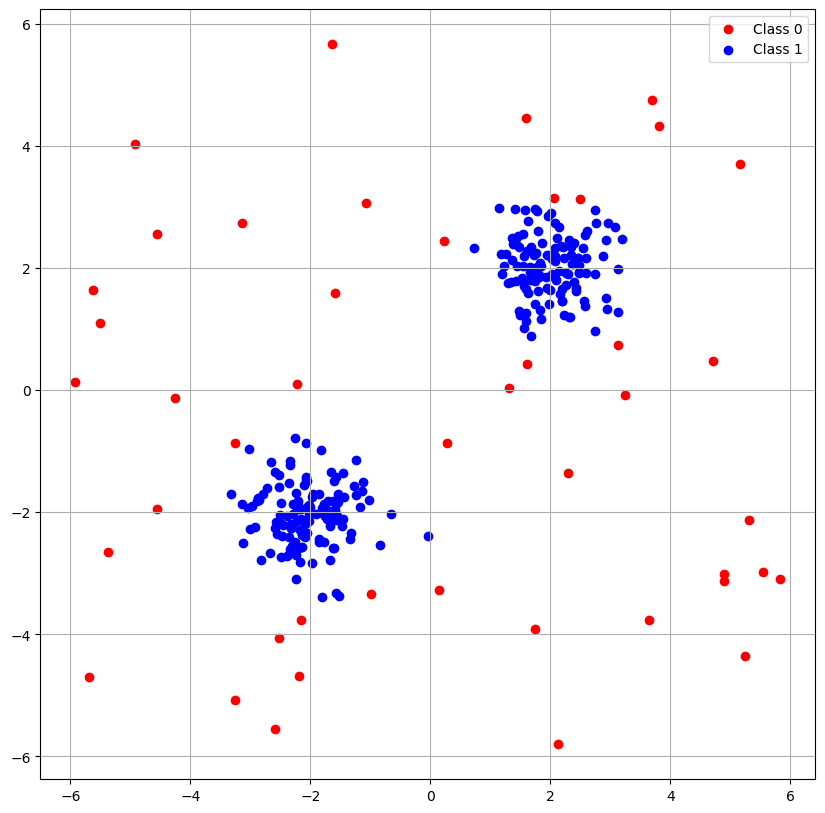

In [3]:
# Select a Data set and visualizaition of it
#X,y = ds.make_circles(n_samples=800,noise=0.02)
#X,y = ds.make_moons(n_samples=800,noise=0.02)

k=29 # Select the number of dataset
X=XD[k-1]
y=yD[k-1]

fig,ax=plt.subplots(figsize=[5,5])
plot_dataset(X,y,ax)

In [4]:
# Set sigmoid as ACTIVATION function
def actfun(t):
    return 1.0/(1.0+np.exp(-t))

In [5]:
# Setup the Network
N=[2,15,10,1]
x0=np.array([1,2])
W=[np.random.randn(N[i+1],N[i])   for i in range(len(N)-1)] 
b=[np.random.randn(N[i+1])       for i in range(len(N)-1)] 
forpro(x0,N,W,b,actfun)
wb=flatten_wb(N,W,b)

In [6]:
# Loss function
def loss(wb):
    W1,b1=unflatten_wb(N,wb)
    s=0
    for i in range(len(y)):
        s=s+(forpro(X[i],N,W1,b1,actfun)-y[i])**2
    return s


### Minimizing Loss function by Sklearn.optimize library

In [7]:
res = minimize(loss, wb, method='bfgs', tol=1e-4)

print(res.message)
res.status
res.success

Optimization terminated successfully.


True

In [8]:
Ws,bs=unflatten_wb(N,res.x)

In [9]:
tx=np.linspace(X[:,0].min(),X[:,0].max(),300)
ty=np.linspace(X[:,1].min(),X[:,1].max(),300)
XX,YY=np.meshgrid(tx,ty)
ZZ=np.empty(XX.shape)
for i in range(XX.shape[0]):
    for j in range(XX.shape[1]):
        ZZ[i,j]=forpro(np.array([XX[i,j],YY[i,j]]),N,Ws,bs,actfun)


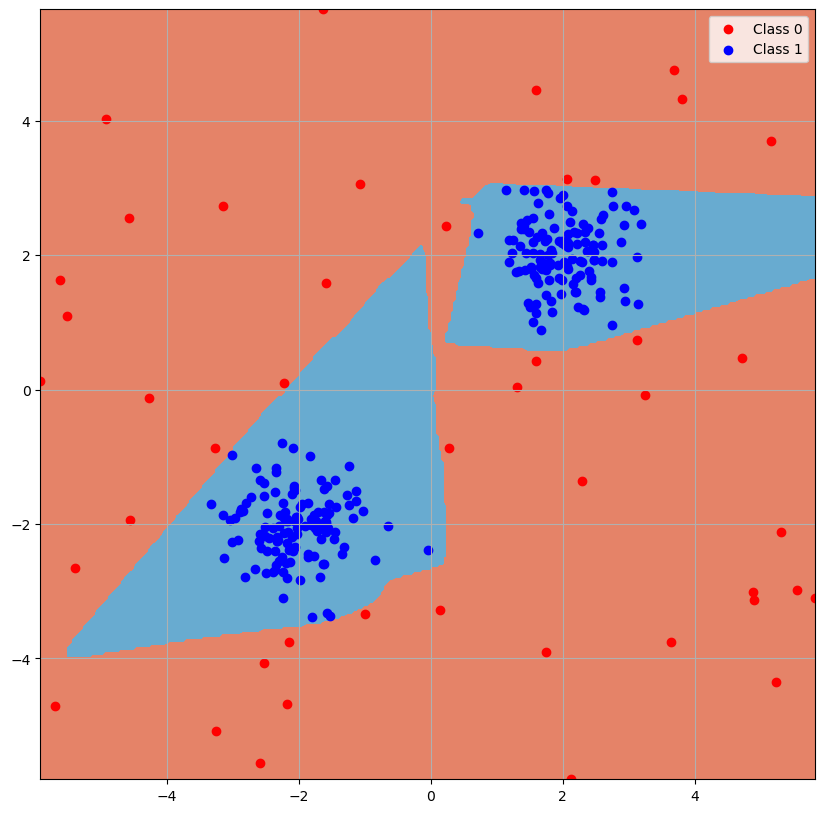

In [10]:
#%matplotlib qt
fig,ax=plt.subplots( figsize=[5,5])
ax.contourf(XX,YY,ZZ,1,cmap='RdBu')
plot_dataset(X,y,ax)


In [11]:
#%matplotlib qt
#fig,ax=plt.subplots(subplot_kw={"projection": "3d"}, figsize=[10, 10])
#ax.plot_surface(XX,YY,ZZ,cmap='RdBu', edgecolor='none')


### ==================================================================

# جمع بندی

در شبکه‌های پرسپترونی، تابع زیان یک تابع تکه‌ای ثابت و ناهموار است.

لذا الگوریتم‌های بهینه‌سازی قادر به یافتن مینیمم آن نبودند.

به همین علت ایده تعویض پرسپترون با نورون سیگموییدی مطرح شد.

شبکه های سیگموییدی هم از ترکیب نورون‌های سیگوییدی حال می‌شوند.

در این نوت‌بوک دیدیک که در شبکه‌های سیگموییدی، استفاده از بهینه‌سازی منجر  به نتایج خوبی در دسته‌بندی می‌‌شود.


اما زمان حل مساله بهینه‌سازی زیاد است و باید فکری به حال آن اندیشیده شود.